### Big Data Project Take #1

In [1]:
import pandas as pd
import numpy as np


In [2]:
df_order = pd.read_csv("/Users/Caner/Desktop/SMU_Class/Managing_Info_Tech_5570/nikita/big_data_group_project/OS_ORDER.txt", sep='\t')

In [3]:
df_order_items = pd.read_csv("/Users/Caner/Desktop/SMU_Class/Managing_Info_Tech_5570/nikita/big_data_group_project/OS_ORDER_ITEMS.txt", sep='\t')

In [4]:
df_order.head()

,ORDER_ID,ORDER_CODE,BUYER_ID,CREATE_DT,PAY_DT,CREATE_IP,ORDER_STATUS,EXCEPTION_STATUS
0,292,100409000801,20076,0000-00-00,NaN,123.127.164.252,z,0
1,293,100409000802,20076,0000-00-00,NaN,123.127.164.252,z,0
2,294,100409000803,20076,0000-00-00,NaN,123.127.164.252,z,0
3,295,100409000804,20076,0000-00-00,NaN,123.127.164.252,z,0
4,312,100413000825,20055,0000-00-00,13-04-2010 15:22:08,123.127.164.252,A,0


In [5]:
df_order = df_order.drop(['CREATE_DT', 'EXCEPTION_STATUS'], axis=1)

In [6]:
df_combined = pd.merge(df_order,df_order_items, how= 'inner', left_on='ORDER_ID', right_on= 'ORDER_ID')

In [7]:
df_date = df_order['PAY_DT'].str.split(' ', 1, expand=True)
# split yymmdd from hh

In [8]:
df_date.columns = ["year", "time"] 
# rename

In [9]:
df_date_split = df_date["year"].str.split('-', 0, expand=True)
# 

In [10]:
df_m_y = df_date_split.loc[:,[1,2]]

In [11]:
df_date_split.bfill(inplace = True)
df_date_split.ffill(inplace = True)


In [12]:
df_date_split.head()


,0,1,2
0,13,04,2010
1,13,04,2010
2,13,04,2010
3,13,04,2010
4,13,04,2010


In [13]:
df_m_y.columns = ['month', 'year']


In [14]:
df_date_split.columns = ['day', 'month', 'year']

In [15]:
df_m_y.bfill(inplace = True)
df_m_y.ffill(inplace = True) # for the last couple observations

In [16]:
df_m_y['period'] = df_m_y[['month', 'year']].apply(lambda x: '/'.join(filter(None,x)), axis=1)


In [17]:
df_date_split['date'] = df_date_split[['day', 'month', 'year']].apply(lambda x: '/'.join(filter(None,x)), axis=1)

In [18]:
df_date_split.head()

,day,month,year,date
0,13,04,2010,13/04/2010
1,13,04,2010,13/04/2010
2,13,04,2010,13/04/2010
3,13,04,2010,13/04/2010
4,13,04,2010,13/04/2010


In [19]:
df_c = pd.concat([df_order.reset_index(drop=True), df_m_y['period'], df_date_split['date']], axis=1)

In [20]:
df_c.head()

,ORDER_ID,ORDER_CODE,BUYER_ID,PAY_DT,CREATE_IP,ORDER_STATUS,period,date
0,292,100409000801,20076,NaN,123.127.164.252,z,04/2010,13/04/2010
1,293,100409000802,20076,NaN,123.127.164.252,z,04/2010,13/04/2010
2,294,100409000803,20076,NaN,123.127.164.252,z,04/2010,13/04/2010
3,295,100409000804,20076,NaN,123.127.164.252,z,04/2010,13/04/2010
4,312,100413000825,20055,13-04-2010 15:22:08,123.127.164.252,A,04/2010,13/04/2010


In [21]:

df_c['period'] = pd.to_datetime(df_c['period'], format="%m/%Y")
df_c_group = df_c.groupby('period').count()[['ORDER_ID']]



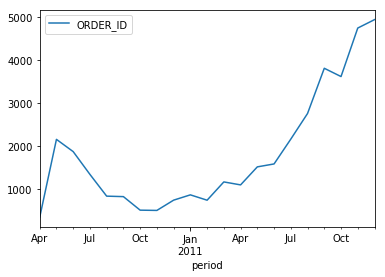

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
df_c_group.plot(kind="line")

In [23]:
### CUSTOMER SEGMENTATION ###
# Recency # 
df_c.shape

(38275, 8)

In [24]:
from datetime import datetime
day_last = datetime.strptime("15/12/2011", "%d/%m/%Y")
df_c['date'] = pd.to_datetime(df_c['date'])
df_c['recency'] = day_last - df_c['date']

In [25]:
df_c.head()

,ORDER_ID,ORDER_CODE,BUYER_ID,PAY_DT,CREATE_IP,ORDER_STATUS,period,date,recency
0,292,100409000801,20076,NaN,123.127.164.252,z,2010-04-01,2010-04-13,611 days
1,293,100409000802,20076,NaN,123.127.164.252,z,2010-04-01,2010-04-13,611 days
2,294,100409000803,20076,NaN,123.127.164.252,z,2010-04-01,2010-04-13,611 days
3,295,100409000804,20076,NaN,123.127.164.252,z,2010-04-01,2010-04-13,611 days
4,312,100413000825,20055,13-04-2010 15:22:08,123.127.164.252,A,2010-04-01,2010-04-13,611 days


In [26]:
df_combined = pd.merge(df_c, df_order_items, how= 'inner', left_on='ORDER_ID', right_on= 'ORDER_ID')

In [27]:
df_combined.head()

,ORDER_ID,ORDER_CODE,BUYER_ID,PAY_DT,CREATE_IP,ORDER_STATUS,period,date,recency,ITEM_ID,GOODS_ID,GOODS_NUMBER,SHOP_PRICE,GOODS_PRICE,GOODS_AMOUNT
0,292,100409000801,20076,NaN,123.127.164.252,z,2010-04-01,2010-04-13,611 days,425,1010060,999.0,10.4,10.4,10389.6
1,292,100409000801,20076,NaN,123.127.164.252,z,2010-04-01,2010-04-13,611 days,426,1001716,999.0,16.8,16.8,16783.2
2,293,100409000802,20076,NaN,123.127.164.252,z,2010-04-01,2010-04-13,611 days,427,1010060,2.0,10.4,10.4,20.8
3,294,100409000803,20076,NaN,123.127.164.252,z,2010-04-01,2010-04-13,611 days,428,1010060,6.0,10.4,10.4,62.4
4,295,100409000804,20076,NaN,123.127.164.252,z,2010-04-01,2010-04-13,611 days,429,1010060,2.0,10.4,10.4,20.8


In [28]:
df_combined.drop(['GOODS_AMOUNT'], axis=1, inplace = True)

In [29]:
df_combined['GOODS_AMOUNT'] = df_combined.apply(lambda x:x['GOODS_PRICE']*x['GOODS_NUMBER'] , axis=1)
# Good Amount re-create correctly

In [30]:
df_combined['PROFIT'] = df_combined.apply(lambda x:(x['SHOP_PRICE']-x['GOODS_PRICE'])*x['GOODS_NUMBER'] , axis=1)
# Profit column created

In [31]:
df_combined.head()

,ORDER_ID,ORDER_CODE,BUYER_ID,PAY_DT,CREATE_IP,ORDER_STATUS,period,date,recency,ITEM_ID,GOODS_ID,GOODS_NUMBER,SHOP_PRICE,GOODS_PRICE,GOODS_AMOUNT,PROFIT
0,292,100409000801,20076,NaN,123.127.164.252,z,2010-04-01,2010-04-13,611 days,425,1010060,999.0,10.4,10.4,10389.6,0.0
1,292,100409000801,20076,NaN,123.127.164.252,z,2010-04-01,2010-04-13,611 days,426,1001716,999.0,16.8,16.8,16783.2,0.0
2,293,100409000802,20076,NaN,123.127.164.252,z,2010-04-01,2010-04-13,611 days,427,1010060,2.0,10.4,10.4,20.8,0.0
3,294,100409000803,20076,NaN,123.127.164.252,z,2010-04-01,2010-04-13,611 days,428,1010060,6.0,10.4,10.4,62.4,0.0
4,295,100409000804,20076,NaN,123.127.164.252,z,2010-04-01,2010-04-13,611 days,429,1010060,2.0,10.4,10.4,20.8,0.0


In [32]:
df_combined[df_combined > 0.0].count()

ORDER_ID        240331
ORDER_CODE      240331
BUYER_ID        240331
PAY_DT          219448
CREATE_IP       240331
ORDER_STATUS    240331
period          240331
date            240331
recency         238882
ITEM_ID         240331
GOODS_ID        240331
GOODS_NUMBER    239783
SHOP_PRICE      239911
GOODS_PRICE     236042
GOODS_AMOUNT    235495
PROFIT          135429
dtype: int64

In [33]:
df_freq = df_order.groupby('BUYER_ID').count()[['ORDER_ID']]

In [34]:
df_freq.head()

,ORDER_ID
BUYER_ID,
9004,26
9005,115
9006,5
9008,19
9009,4


In [35]:
df_freq.shape

(11908, 1)

In [36]:
df_recency = df_combined.groupby('BUYER_ID').min()


In [37]:
df_profit = df_combined.groupby('BUYER_ID').count()

In [38]:
df_rfm = pd.concat([df_freq['ORDER_ID'], df_recency['recency'].dt.days, df_profit['PROFIT']], axis = 1)
#combine r - f - m

In [39]:
df_rfm.columns = ['frequency', 'recency', 'profit']

In [40]:
df_rfm.sort_values(by=['profit'], ascending = False).head()

,frequency,recency,profit
BUYER_ID,,,
10023,204,1,2116
33961,160,1,1209
11839,62,17,1065
165805,59,0,900
42369,100,5,894


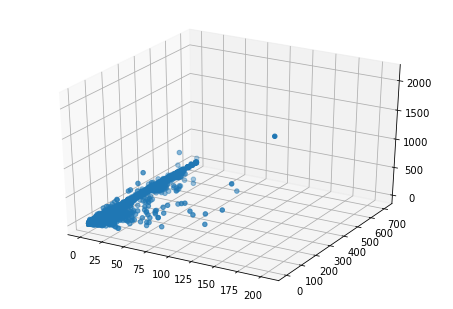

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df_rfm['frequency'], df_rfm['recency'], df_rfm['profit'])
#df_rfm.loc[:,0].head()

In [42]:
Ks = range(1, 10)
km = [KMeans(n_clusters=i) for i in Ks]
score = [abs(km[i].fit(df_rfm).score(df_rfm)) for i in range(len(km))]

NameError: name 'KMeans' is not defined

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
#score.plot(kind="line")
plt.scatter(Ks, score)


In [ ]:
score

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans = kmeans.fit(df_rfm)

In [ ]:
labels = kmeans.predict(df_rfm)

In [ ]:
centroids = kmeans.cluster_centers_

In [ ]:
centroids

In [ ]:
df_rfm.to_csv('rfm.csv', sep=',')

In [ ]:
df_rfm2 = df_rfm[df_rfm['profit'] > 10].sort_values(by=['profit'], ascending=True)
df_rfm2.shape

In [ ]:
df_rfm.shape

In [45]:
df_rfm.head()

,frequency,recency,profit
BUYER_ID,,,
9004,26,2,98
9005,115,2,601
9006,5,375,29
9008,19,372,79
9009,4,423,23
